In [1]:
import pandas as pd
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
top_richest = pd.read_csv('top_100_richest.csv', index_col='rank')
countries_stats = pd.read_csv('wiki_number_of_billionaires.csv')

In [10]:
top_richest.head()

,name,net_worth,bday,age,nationality
rank,,,,,
1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America


In [22]:
ages = top_richest[['name', 'age']].iloc[:5]

In [23]:
ages

,name,age
rank,,
1,Elon Musk,51.0
2,Jeff Bezos,58.0
3,Gautam Adani,60.0
4,Bernard Arnault,73.0
5,Bill Gates,66.0


<BarContainer object of 5 artists>

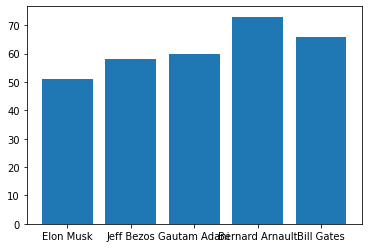

In [33]:
plt.bar(ages['name'], height=ages['age'])